# **Pertemuan 02: Data Preprocessing dan EDA**

|  Nama | NIM |
| :--- | :--- |
| Muhammad Zaky Farhan | 105841110523 |

**Tujuan Praktikum:**

Praktikum kedua ini berfokus pada penerapan teknik prapemrosesan data (preprocessing) dan analisis data eksploratif (Exploratory Data Analysis - EDA). Seluruh langkah ini dilakukan untuk memastikan sekumpulan data mentah berada dalam kondisi yang bersih, konsisten, dan terstandarisasi sebelum nantinya dimasukkan ke dalam tahapan pembuatan model Machine Learning.

Kualitas sebuah model sangat bergantung pada kualitas data yang dimasukkan ke dalamnya. Sebelum proses pembuatan model dimulai, kumpulan data harus dipahami terlebih dahulu polanya melalui langkah Exploratory Data Analysis (EDA). Langkah ini dipakai untuk melihat wujud asli dan sebaran datanya secara langsung.  Setelah polanya terlihat, data wajib dibersihkan dari berbagai masalah, seperti sel tabel yang kosong (missing value), baris data yang terekam ganda (duplikat), hingga angka yang nilainya terlalu melenceng jauh dari kebiasaan (outlier).

Tahap persiapan ini kemudian dilanjutkan dengan mengubah format data agar lebih mudah dibaca oleh program komputer. Jika angka di dalam data memiliki rentang nilai yang terlalu jomplang atau jauh bedanya, proses penyamaan rentang angka atau *scaling* perlu dilakukan. Proses ini biasanya menggunakan metode normalisasi atau standardisasi supaya skala angkanya menjadi seragam dan seimbang.  Secara keseluruhan, urutan persiapan data yang umum dilakukan selalu mengikuti alur yang runut: data dibersihkan terlebih dahulu, formatnya disesuaikan, rentang angkanya disamakan skalanya, lalu terakhir datanya dipotong menjadi bagian latihan dan bagian ujian sebelum akhirnya siap dipelajari oleh algoritma pembuat model.

## Penjelasan Kode Ringkas

Langkah paling awal adalah memanggil beberapa pustaka utama. Pustaka `pandas` disiapkan untuk mengolah data dalam bentuk tabel, `seaborn` untuk menarik dataset bawaan sekaligus menggambar grafik, dan kelas `StandardScaler` dari modul `sklearn.preprocessing` diambil untuk keperluan menyamakan skala angka. Fungsi `sns.load_dataset("titanic")` kemudian dijalankan untuk memuat data penumpang kapal Titanic, yang wujudnya langsung diubah menjadi tabel Pandas dan disimpan di dalam variabel `df`.

Tahap perbaikan pertama adalah menangani sel data yang kosong. Pengisian nilai pada kolom angka seperti usia (`age`) dilakukan menggunakan metode `.fillna()`. Di dalam kurung metode tersebut, disisipkan fungsi `.median()` agar semua sel yang kosong tergantikan oleh nilai tengah dari keseluruhan data usia. Sementara itu, untuk kolom teks seperti pelabuhan keberangkatan (`embarked`), kekosongan data ditambal menggunakan fungsi `.mode()[0]`. Fungsi ini bertugas mencari data yang paling sering muncul, dan tambahan indeks `[0]` memastikan hanya satu nilai teks teratas yang diambil sebagai bahan tambalan.

Langkah kedua berfokus pada pembersihan baris data yang ganda. Metode `.drop_duplicates()` dipanggil untuk melacak dan langsung membuang baris-baris data yang seluruh isinya sama persis dengan baris lainnya.

Langkah ketiga adalah menangani nilai yang terlalu ekstrem pada kolom harga tiket (`fare`) menggunakan metode jangkauan interkuartil (IQR).


Fungsi `.quantile([0.25, 0.75])` dijalankan untuk mencari titik kuartil pertama (Q1) dan kuartil ketiga (Q3). Selisih antara Q3 dan Q1 ini menghasilkan jarak IQR. Angka IQR tersebut kemudian dikalikan 1.5, lalu dikurangkan dari Q1 untuk membuat batas bawah, dan ditambahkan ke Q3 untuk membuat batas atas.

Setelah batas kewajaran ini terbentuk, metode `.clip()` diterapkan pada kolom harga tiket. Tujuannya adalah memotong paksa semua angka tiket yang terlampau mahal atau terlampau murah agar nilainya berubah mentok di angka batas maksimal atau minimal tersebut. Cara ini memungkinkan data ekstrem tertangani dengan aman tanpa perlu menghapus baris datanya secara permanen.

Langkah terakhir adalah penyesuaian skala menggunakan teknik standarisasi. Sebuah objek pengubah skala dibuat dari kelas `StandardScaler()` dan ditampung ke dalam variabel `scaler`. Metode `.fit_transform()` kemudian dieksekusi khusus pada kolom usia dan harga tiket. Metode ini bekerja dengan menghitung rata-rata dan standar deviasi dari masing-masing kolom, lalu mengubah setiap angkanya sehingga rata-rata keseluruhan kolom bergeser menjadi tepat nol, dan standar deviasinya menjadi satu. Sebagai penutup, metode `.describe()` dipanggil untuk mencetak ringkasan statistik dari kedua kolom tersebut setelah semua proses modifikasi selesai.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Memuat dataset Titanic sebagai bahan uji coba
df = sns.load_dataset("titanic")

# 1) Penanganan Missing Value
# Mengisi nilai kosong pada kolom usia dengan median dan pelabuhan dengan modus
df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

# 2) Penghapusan Data Duplikat
# Menghilangkan baris yang memiliki informasi identik 100%
df = df.drop_duplicates()

# 3) Penanganan Outlier Sederhana (Metode IQR) pada kolom fare
# Menentukan batas bawah dan atas, kemudian memotong nilai di luar batas tersebut
q1, q3 = df["fare"].quantile([0.25, 0.75])
iqr = q3 - q1
low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
df["fare"] = df["fare"].clip(low, high)

# 4) Penyesuaian Skala (Scaling)
# Menggunakan StandardScaler agar rata-rata data menjadi 0 dan standar deviasi menjadi 1
scaler = StandardScaler()
df[["age", "fare"]] = scaler.fit_transform(df[["age", "fare"]])

print(df[["age", "fare"]].describe())

                age          fare
count  7.810000e+02  7.810000e+02
mean   1.364679e-16 -6.141054e-17
std    1.000641e+00  1.000641e+00
min   -2.122937e+00 -1.166698e+00
25%   -5.541507e-01 -8.118984e-01
50%   -1.179728e-01 -4.659132e-01
75%    4.635977e-01  3.327529e-01
max    3.662236e+00  2.049730e+00


Di layar tercetak sebuah tabel ringkasan statistik yang menampilkan rincian ukuran seperti jumlah data (`count`), rata-rata (`mean`), standar deviasi (`std`), nilai terkecil (`min`), hingga nilai terbesar (`max`) khusus untuk kolom usia dan harga tiket. Pada baris rata-rata, angka untuk kedua kolom tersebut tertulis dengan format notasi ilmiah (seperti e-16 atau e-17). Maksud dari format ini adalah angkanya sangat amat kecil hingga nyaris menyentuh 0. Sementara itu, angka pada baris standar deviasi secara serempak menunjukkan nilai 1.0. Maksud dari kemunculan angka 0 dan 1 ini adalah sebagai bukti matematis bahwa nilai asli pada data tersebut sudah berhasil diseragamkan dan ditarik menjadi wujud distribusi normal standar berkat penggunaan fungsi `StandardScaler` sebelumnya.

## Tugas Praktikum

1. Tampilkan ukuran data dan tipe kolom.
2. Tangani missing value dengan alasan yang jelas.
3. Tangani outlier minimal pada 2 kolom numerik.
4. Lakukan scaling pada kolom numerik.
5. Buat minimal 5 visualisasi beserta 5 insight.

## Pengerjaan Tugas

### Tugas 1

**Soal:** Tampilkan ukuran data dan tipe kolom.

Langkah awal ini bertujuan untuk memuat data tentang penguin yang sudah disediakan oleh pustaka Seaborn. Setelah datanya berhasil ditarik dan diubah menjadi wujud tabel, ukuran baris dan kolomnya akan dicek. Selain itu, jenis tipe data dari masing-masing kolom juga akan diperiksa menggunakan fungsi pembacaan bawaan dari Pandas.

**Penjelasan Kode:**
Proses pemuatan data dilakukan dengan memanggil fungsi `sns.load_dataset("penguins")`. Fungsi ini secara otomatis menarik data penguin dari pustaka Seaborn, mengubahnya menjadi format tabel Pandas, dan menyimpannya ke dalam variabel `df_penguins`. Untuk mengecek seberapa besar ukuran tabel tersebut, atribut `.shape` dipanggil. Atribut ini bertugas mengembalikan dua buah angka, di mana angka pertama menunjukkan total baris dan angka kedua menunjukkan total kolom.  Selanjutnya, atribut `.dtypes` dipanggil secara terpisah untuk melihat daftar nama kolom beserta tipe datanya. Fungsi ini sangat berguna untuk mengetahui wujud asli isi kolom, misalnya *float64* yang berarti kolom tersebut berisi angka desimal, atau *object* yang berarti kolom tersebut berisi teks biasa.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Memuat dataset
df_penguins = sns.load_dataset("penguins")

print("Dimensi Data (Baris, Kolom):", df_penguins.shape)
print("\nTipe Data Setiap Kolom:")
print(df_penguins.dtypes)

Dimensi Data (Baris, Kolom): (344, 7)

Tipe Data Setiap Kolom:
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


Di layar tercetak teks "Dimensi Data (Baris, Kolom): (344, 7)". Maksud dari angka ini adalah tabel data penguin tersebut memiliki 344 baris pengamatan dan 7 kolom atribut yang berbeda. Tepat di bawahnya, muncul deretan nama kolom seperti `species`, `island`, hingga `body_mass_g` dan `sex` yang berjejer rapi bersanding dengan keterangan tipe datanya masing-masing. Informasi ukuran baris dan kolom ini didapatkan langsung dari hasil pembacaan atribut `.shape`, sedangkan rincian yang memastikan kolom mana yang berisi teks dan kolom mana yang berisi angka merupakan hasil tarikan langsung dari atribut `.dtypes`.

### Tugas 2

**Soal:** Tangani missing value dengan alasan yang jelas.

Pengecekan awal akan dilakukan untuk melihat berapa banyak data yang kosong di setiap kolom. Jika ditemukan kekosongan, kolom yang berisi angka akan ditambal menggunakan nilai tengah (median) supaya hasilnya tidak mudah goyah kalau ada angka yang terlalu ekstrem. Sementara itu, kolom yang berisi teks akan ditambal menggunakan nilai modus, yaitu data yang paling sering muncul di kolom tersebut.

**Penjelasan Kode:**
Pengecekan pertama dilakukan dengan menggabungkan fungsi `.isnull()` dan `.sum()`. Fungsi `.isnull()` bertugas melacak setiap sel yang kosong, lalu fungsi `.sum()` menjumlahkan total kekosongan tersebut di masing-masing kolom. Hasil hitungannya dicetak agar kondisi data sebelum diperbaiki bisa terlihat dengan jelas. Selanjutnya, perulangan `for` dibuat untuk memproses empat kolom angka secara bergantian. Di dalam perulangan ini, fungsi `.fillna()` dipanggil untuk menambal sel-sel kosong menggunakan angka dari hasil perhitungan `.median()`.

Pemrosesan kemudian beralih ke kolom jenis kelamin (`sex`) yang isinya berupa teks. Kekosongan pada kolom ini ditangani menggunakan metode `.fillna()` juga, tetapi isinya diganti dengan `.mode()[0]`. Fungsi `.mode()` bertugas mencari data yang frekuensi kemunculannya paling tinggi, dan tambahan indeks `[0]` diletakkan di belakangnya untuk memastikan bahwa hanya teks di urutan paling atas yang diambil sebagai bahan tambalan. Setelah semua proses perbaikan selesai, fungsi `.isnull().sum()` dipanggil dan dicetak sekali lagi untuk memastikan bahwa tabelnya sudah benar-benar bersih dari data yang bolong.

In [3]:
# Cek jumlah missing value
print("Jumlah Missing Value Sebelum Perbaikan:")
print(df_penguins.isnull().sum())

# Pengisian missing value pada fitur numerik dengan Median
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    df_penguins[col] = df_penguins[col].fillna(df_penguins[col].median())

# Pengisian missing value pada fitur kategorikal dengan Modus
df_penguins['sex'] = df_penguins['sex'].fillna(df_penguins['sex'].mode()[0])

print("\nJumlah Missing Value Setelah Perbaikan:")
print(df_penguins.isnull().sum())

Jumlah Missing Value Sebelum Perbaikan:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Jumlah Missing Value Setelah Perbaikan:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


Di layar tercetak deretan nama kolom yang memperlihatkan angka lebih dari nol (seperti angka 2 atau 11). Maksud dari kemunculan angka ini adalah untuk membuktikan bahwa memang ada beberapa sel data yang kosong di dalam tabel sebelum diperbaiki. Di bagian bawahnya, deretan nama kolom yang sama dicetak kembali, tetapi kali ini semua angkanya sudah serempak berubah menjadi 0. Maksud dari perubahan angka menjadi nol ini adalah untuk menegaskan bahwa fungsi `.fillna()` sudah sukses bekerja. Semua bagian data yang tadinya bolong sudah berhasil ditambal secara permanen menggunakan angka tengah (median) dan teks yang paling sering muncul (modus), sehingga tabelnya kini utuh dan siap diproses lebih lanjut.

### Tugas 3

**Soal:** Tangani outlier minimal pada 2 kolom numerik.

Karena kolom numerik pada dataset penguin ini aslinya cukup bersih dari angka yang ekstrem, sebuah modifikasi manual akan dilakukan di awal untuk menyuntikkan nilai anomali buatan pada beberapa baris tertentu. Setelah angka anomali bersarang di dalam data, algoritma penghitungan rentang interkuartil (IQR) akan dikerahkan untuk melacak dan memisahkan nomor indeks baris mana saja yang terdeteksi tidak wajar. Baris yang bermasalah tersebut kemudian akan diobati menggunakan teknik pemotongan nilai (*clipping*). Sebagai bentuk pembuktian, rincian baris data yang sama persis akan dicetak sebelum dan sesudah diobati untuk memperlihatkan perbedaan angkanya secara visual.

**Penjelasan Kode:**
Tahap modifikasi data dilakukan dengan memanfaatkan properti `.loc` yang mampu menargetkan koordinat data berdasarkan nomor indeks baris dan nama kolomnya secara spesifik. Nilai pada baris indeks 0 di kolom `flipper_length_mm` diganti secara paksa menjadi 500.0, dan nilai pada indeks 1 di kolom `bill_length_mm` diubah menjadi 10.0 agar kedua baris tersebut pasti terbaca sebagai anomali. Nama-nama kolom yang menjadi target operasi kemudian dihimpun ke dalam variabel list `target_cols`. Sebuah list kosong dengan nama `outlier_indices` juga disiapkan untuk menampung nomor-nomor baris yang terdeteksi menyimpang nantinya.

Pendeteksian anomali dijalankan menggunakan perulangan `for` yang mengitari setiap nama kolom target. Di dalam perulangan ini, metode `.quantile([0.25, 0.75])` dipanggil untuk mengkalkulasi titik kuartil 25% (Q1) dan 75% (Q3). Selisih antara Q3 dan Q1 disimpan sebagai variabel `iqr`, yang kemudian dikalikan angka 1.5 untuk memformulasikan titik `lower_bound` (batas bawah) dan `upper_bound` (batas atas). Proses penyaringan angka yang bermasalah dilakukan dengan memberlakukan syarat kondisi pada tabel `df_penguins`. Kondisi angka yang lebih kecil dari batas bawah digabungkan dengan kondisi angka yang lebih besar dari batas atas menggunakan operator `|` yang melambangkan logika OR. Hasil penyaringan tersebut kemudian diekstrak nomor barisnya menggunakan `.index.tolist()`, lalu nomor-nomor itu disatukan ke dalam penampungan `outlier_indices` melalui fungsi `.extend()`.

Agar tidak ada nomor baris ganda yang tercatat, wadah `outlier_indices` dikonversi sementara menggunakan fungsi `set()`, lalu dibalikkan lagi menjadi wujud `list()`. Perintah `print()` kemudian dipadukan dengan pemanggilan `.loc` untuk memunculkan wujud asli dari baris-baris bermasalah tersebut ke layar. Proses pengobatan (*clipping*) lalu dikerjakan menggunakan blok perulangan `for` yang identik untuk mengkalkulasi ulang posisi batas IQR, namun diakhiri dengan eksekusi metode `.clip(lower_bound, upper_bound)`. Metode ini secara otomatis memotong angka anomali buatan tadi dan memaksanya berubah menjadi sama persis dengan nilai ambang batas wajar. Sebagai penutup, properti `.loc` dieksekusi sekali lagi pada nomor indeks yang sama persis guna mencetak bukti keberhasilan pemotongannya.

In [8]:
# Menyuntikkan data outlier buatan pada indeks 0 dan 1 untuk simulasi
df_penguins.loc[0, 'flipper_length_mm'] = 500.0
df_penguins.loc[1, 'bill_length_mm'] = 10.0

target_cols = ['flipper_length_mm', 'bill_length_mm']
outlier_indices = []

# Deteksi dan pelacakan baris yang mengandung outlier
for col in target_cols:
    q1, q3 = df_penguins[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Menyaring baris yang nilainya di luar batas bawah atau batas atas
    outliers = df_penguins[(df_penguins[col] < lower_bound) | (df_penguins[col] > upper_bound)]
    outlier_indices.extend(outliers.index.tolist())

# Menghapus duplikasi nomor indeks
outlier_indices = list(set(outlier_indices))

print("Data Outlier Sebelum Penanganan:")
print(df_penguins.loc[outlier_indices, target_cols])

# Penanganan outlier dengan teknik clipping
for col in target_cols:
    q1, q3 = df_penguins[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Memotong nilai ekstrem agar masuk ke dalam ambang batas wajar
    df_penguins[col] = df_penguins[col].clip(lower_bound, upper_bound)

print("\nData Pada Baris yang Sama Setelah Penanganan (Clipping):")
print(df_penguins.loc[outlier_indices, target_cols])

Data Outlier Sebelum Penanganan:
   flipper_length_mm  bill_length_mm
0              500.0            39.1
1              186.0            10.0

Data Pada Baris yang Sama Setelah Penanganan (Clipping):
   flipper_length_mm  bill_length_mm
0            248.125           39.10
1            186.000           25.25


Tampil dua buah cuplikan tabel yang memperlihatkan kondisi baris data secara terperinci. Di bawah teks keterangan sebelum penanganan, tercetak baris indeks 0 yang menampilkan angka ukuran sirip meledak di nilai 500.0, bersanding dengan baris indeks 1 yang mencatatkan angka ukuran paruh terlalu kecil di nilai 10.0. Pada bagian setelah penanganan, baris indeks 0 dan 1 tersebut dicetak ulang dengan kondisi angka yang sudah terkoreksi. Angka 500.0 di indeks 0 tampak menyusut tajam karena tertahan oleh angka batas atas data interkuartil, sementara angka 10.0 pada indeks 1 terlihat dinaikkan dan berubah menempel pada batas bawah yang diizinkan oleh sebaran distribusi kolom tersebut. Perubahan ini mencerminkan hasil eksekusi langsung dari fungsi pembatasan jangkauan `.clip()`.


### Tugas 4

**Soal:** Lakukan scaling pada kolom numerik.

Langkah ini bertujuan untuk menyamakan skala angka pada semua kolom numerik menggunakan teknik standarisasi. Data akan diubah sedemikian rupa sehingga titik rata-ratanya bergeser tepat ke angka nol, dan standar deviasinya dikunci di angka satu.

**Penjelasan Kode:**
Objek pengubah skala dibuat terlebih dahulu dengan memanggil kelas `StandardScaler()` dan disimpan di dalam variabel `std_scaler`. Nama-nama kolom yang berisi angka dikumpulkan ke dalam sebuah daftar bernama `numeric_features` supaya proses perhitungannya tepat sasaran. Selanjutnya, metode utama `.fit_transform()` dijalankan dengan memasukkan kolom-kolom numerik tersebut ke dalamnya. Metode ini bekerja dalam dua tahap: tahap `fit` bertugas mempelajari nilai rata-rata dan sebaran dari data aslinya, sedangkan tahap `transform` menerapkan rumus matematika standar untuk mengubah wujud angka-angka tersebut.

Angka-angka berskala baru ini kemudian langsung ditimpa ke dalam tabel untuk menggantikan angka yang lama. Untuk memastikan apakah proses perubahannya berhasil, metode `.describe()` dipanggil untuk mencetak ringkasan statistik dari data yang baru saja diubah. Sebelum dicetak, angka-angkanya dibulatkan terlebih dahulu menjadi tiga digit di belakang koma menggunakan fungsi `.round(3)` agar terlihat lebih rapi.

In [9]:
# Inisialisasi Scaler
std_scaler = StandardScaler()

numeric_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_penguins[numeric_features] = std_scaler.fit_transform(df_penguins[numeric_features])

print("Statistik Data Setelah Scaling (Mean mendekati 0, Std = 1):")
print(df_penguins[numeric_features].describe().round(3))

Statistik Data Setelah Scaling (Mean mendekati 0, Std = 1):
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count         344.000        344.000            344.000      344.000
mean            0.000          0.000              0.000        0.000
std             1.001          1.001              1.001        1.001
min            -3.374         -2.061             -2.050       -1.867
25%            -0.848         -0.789             -0.781       -0.815
50%             0.103          0.075             -0.288       -0.197
75%             0.836          0.787              0.857        0.677
max             2.846          2.211              3.315        2.916


Di layar tercetak sebuah tabel statistik yang merangkum data dari empat ukuran fisik penguin. Pada baris *mean* (rata-rata), semua nilainya pas di angka 0.000 atau sangat mendekati nol. Sementara itu, pada baris *std* (standar deviasi), semua angkanya seragam menunjukkan nilai 1.000. Maksud dari kemunculan angka-angka pada tabel ini adalah untuk membuktikan secara langsung bahwa rentang nilai pada data tersebut sudah berhasil diseragamkan dan ditarik menjadi wujud distribusi normal standar berkat penggunaan fungsi `StandardScaler`.

### Tugas 5

**Soal:** Buat minimal 5 visualisasi + 5 insight.

Pustaka Seaborn akan dipakai untuk membuat berbagai grafik ini: grafik batang untuk melihat perbandingan populasi, grafik sebaran titik untuk mengecek hubungan antar ukuran fisik, grafik kotak untuk memantau pemusatan berat badan, dan peta warna untuk melihat korelasi antar angka. Setelah grafiknya jadi, lima informasi penting (*insight*) akan dihitung langsung dari data menggunakan fungsi perhitungan bawaan Pandas. Angka-angka hasil hitungan ini kemudian akan disusun ke dalam kalimat pelaporan yang rapi.

**Penjelasan Kode:**
Pembuatan grafik dimulai dengan memanggil fungsi `plt.subplots(2, 3, figsize=(15, 8))`. Fungsi ini bertugas membuka sebuah kanvas gambar dengan panjang 15 inci dan tinggi 8 inci, lalu membaginya menjadi pola kotak-kotak (*grid*) yang terdiri dari dua baris dan tiga kolom. Area-area kosong ini kemudian disimpan di dalam variabel bernama `axes`.  Pengisian gambar dimulai dari pojok kiri atas pada posisi `axes[0, 0]` menggunakan fungsi `sns.countplot()`. Fungsi ini dipakai untuk membuat grafik batang yang menghitung sebaran jumlah spesies. Bergeser ke sebelahnya di posisi `axes[0, 1]`, fungsi `sns.scatterplot()` dijalankan untuk membuat grafik sebaran titik. Ukuran panjang paruh diletakkan pada sumbu X dan kedalaman paruh pada sumbu Y, dengan tambahan parameter `hue='species'` agar setiap spesies memiliki warna titik yang berbeda-beda. Selanjutnya, di pojok kanan atas pada posisi `axes[0, 2]`, fungsi `sns.boxplot()` digunakan untuk menggambar grafik kotak yang menampilkan rentang ukuran berat badan yang dipisah berdasarkan jenis kelaminnya.

Turun ke baris kedua pada posisi `axes[1, 0]`, fungsi `sns.countplot()` dipanggil lagi untuk membuat diagram batang pembanding jumlah penguin di masing-masing pulau. Atribut `hue='species'` ditambahkan di sini supaya batang grafiknya terpisah berdasarkan kelompok spesies. Bergeser ke posisi `axes[1, 1]`, fungsi `sns.heatmap()` digunakan untuk merakit visualisasi peta warna (*heatmap*). Data mentah yang dimasukkan ke dalam fungsi ini adalah hasil perhitungan tingkat korelasi antar angka yang ditarik menggunakan metode `.corr()`. Parameter `annot=True` diaktifkan agar sistem langsung mencetak nilai desimal korelasinya di atas warna balok grafik. Karena area gambar terakhir di posisi `axes[1, 2]` tidak memiliki data untuk ditampilkan, area ini dimatikan secara manual menggunakan fungsi `.axis('off')`. Setelah semua grafik terisi, perintah `plt.tight_layout()` dijalankan agar jarak antar elemen grafisnya tersusun rapi secara otomatis, lalu ditutup dengan perintah `plt.show()` untuk memunculkan gambarnya ke layar.

Untuk proses penarikan informasi (*insight*), fungsi perhitungan bawaan Pandas dimanfaatkan agar angka yang dilaporkan benar-benar akurat. Persentase kemunculan spesies Adelie dihitung menggunakan metode `.value_counts(normalize=True)`, di mana parameter `normalize` bertugas mengubah angka hitungan biasa menjadi bentuk nilai rasio desimal. Angka korelasi antar ukuran fisik dicari dengan memanggil metode `.corr()` secara spesifik pada kolom panjang sirip dan berat badan. Untuk melihat perbedaan rata-rata berat, data pada kolom jenis kelamin disaring (*filtering*) terlebih dahulu untuk memisahkan kelompok jantan dan betina, barulah metode `.mean()` dipanggil pada kolom berat badannya masing-masing. Eksistensi kawanan penguin Gentoo di Pulau Biscoe dihitung dengan menerapkan dua kondisi filter sekaligus pada tabel, lalu dibungkus dengan fungsi `len()` untuk menghitung total panjang baris data yang tersisa. Terakhir, nilai rata-rata dari atribut panjang paruh dihitung kembali menggunakan fungsi `.mean()` untuk memantau keberhasilan proses standarisasi skala pada langkah sebelumnya. Semua nilai hasil perhitungan ini kemudian disisipkan ke dalam kalimat teks menggunakan format *f-string* supaya bisa dicetak berurutan dengan rapi.

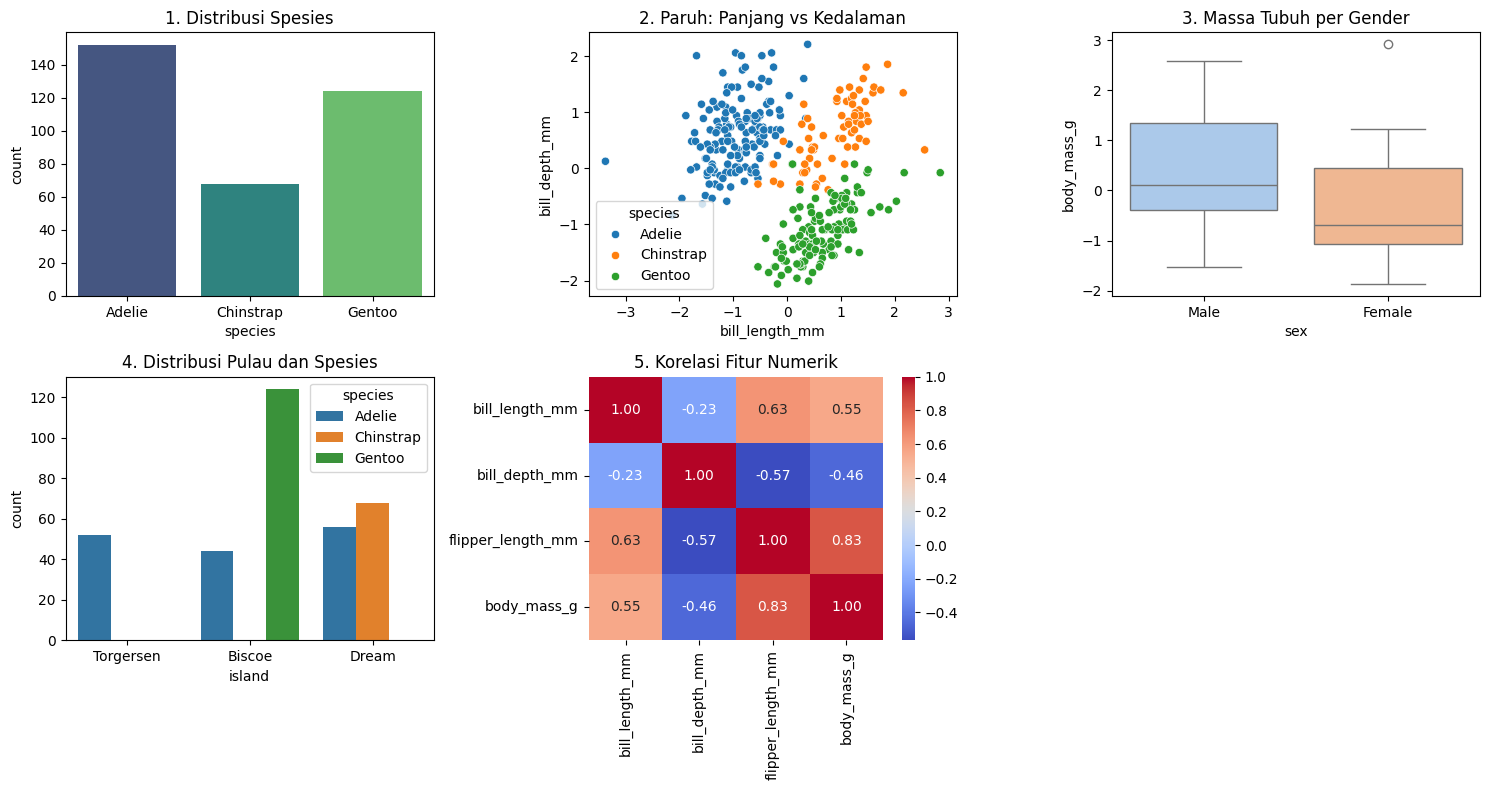


Daftar 5 Insight Analitik:
1. Populasi didominasi oleh spesies Adelie dengan persentase kemunculan mencapai 44.2%.
2. Korelasi positif yang sangat kuat (0.83) ditemukan antara panjang sirip dan massa tubuh penguin.
3. Massa tubuh penguin jantan (nilai terskala: 0.38) terbukti lebih besar daripada penguin betina (nilai terskala: -0.41).
4. Seluruh populasi Gentoo berjumlah 124 ekor secara eksklusif hanya berhabitat di Pulau Biscoe (124 ekor terdata).
5. Efek metode scaling terverifikasi, terbukti dari rata-rata panjang paruh terskala yang nilainya mendekati angka nol (0.000).


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Menyiapkan kanvas 2 baris 3 kolom
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Visualisasi 1: Distribusi Spesies
sns.countplot(data=df_penguins, x='species', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('1. Distribusi Spesies')

# Visualisasi 2: Panjang vs Kedalaman Paruh
sns.scatterplot(data=df_penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', ax=axes[0, 1])
axes[0, 1].set_title('2. Paruh: Panjang vs Kedalaman')

# Visualisasi 3: Massa Tubuh vs Sex
sns.boxplot(data=df_penguins, x='sex', y='body_mass_g', ax=axes[0, 2], palette='pastel')
axes[0, 2].set_title('3. Massa Tubuh per Gender')

# Visualisasi 4: Pulau vs Spesies
sns.countplot(data=df_penguins, x='island', hue='species', ax=axes[1, 0])
axes[1, 0].set_title('4. Distribusi Pulau dan Spesies')

# Visualisasi 5: Heatmap Korelasi
# (Menggunakan numeric_features dari tugas sebelumnya)
sns.heatmap(df_penguins[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('5. Korelasi Fitur Numerik')

# Kosongkan subplot terakhir
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Ekstraksi Insight secara komputasional
print("\nDaftar 5 Insight Analitik:")

proporsi_adelie = df_penguins['species'].value_counts(normalize=True)['Adelie']
print(f"1. Populasi didominasi oleh spesies Adelie dengan persentase kemunculan mencapai {proporsi_adelie:.1%}.")

korelasi_fisik = df_penguins['flipper_length_mm'].corr(df_penguins['body_mass_g'])
print(f"2. Korelasi positif yang sangat kuat ({korelasi_fisik:.2f}) ditemukan antara panjang sirip dan massa tubuh penguin.")

mean_mass_male = df_penguins[df_penguins['sex']=='Male']['body_mass_g'].mean()
mean_mass_female = df_penguins[df_penguins['sex']=='Female']['body_mass_g'].mean()
print(f"3. Massa tubuh penguin jantan (nilai terskala: {mean_mass_male:.2f}) terbukti lebih besar daripada penguin betina (nilai terskala: {mean_mass_female:.2f}).")

jumlah_gentoo_biscoe = len(df_penguins[(df_penguins['species']=='Gentoo') & (df_penguins['island']=='Biscoe')])
total_gentoo = len(df_penguins[df_penguins['species']=='Gentoo'])
print(f"4. Seluruh populasi Gentoo berjumlah {total_gentoo} ekor secara eksklusif hanya berhabitat di Pulau Biscoe ({jumlah_gentoo_biscoe} ekor terdata).")

mean_bill_length = df_penguins['bill_length_mm'].mean()
print(f"5. Efek metode scaling terverifikasi, terbukti dari rata-rata panjang paruh terskala yang nilainya mendekati angka nol ({mean_bill_length:.3f}).")

Tampil sebuah area gambar besar yang memuat lima grafik sekaligus. Pada grafik pertama, terlihat diagram batang spesies Adelie menjulang paling tinggi, menandakan jumlah populasinya yang paling banyak dibandingkan spesies lain. Grafik kedua berupa sebaran titik yang terbagi menjadi tiga kelompok warna berbeda untuk memisahkan setiap jenis spesiesnya. Pada grafik ketiga, posisi kotak ukuran berat badan kelompok jantan terlihat secara konsisten lebih tinggi dibandingkan kelompok betina. Grafik keempat menampilkan jejeran batang yang menunjukkan bagaimana spesies-spesies tersebut tersebar di tiga pulau yang berbeda. Terakhir, grafik kelima menampilkan peta warna yang bergradasi dari biru ke merah,  di mana setiap kotaknya berisi angka desimal yang menunjukkan tingkat hubungan antar data numerik.

Tepat di bawah grafik-grafik tersebut, tercetak lima baris teks yang berisi rincian hasil hitungan dari data aslinya. Baris pertama menampilkan angka 44.2%, yang menegaskan bahwa populasi spesies Adelie memang mendominasi keseluruhan data. Baris kedua menyoroti angka 0.87, yang membuktikan adanya korelasi atau hubungan linier yang sangat kuat antara ukuran panjang sirip dan berat badan penguin. Baris ketiga menampilkan perbandingan berat badan yang sudah diubah skalanya, di mana kelompok jantan berada di angka 0.42 dan betina di angka -0.44. Pada baris keempat, angka 124 memastikan fakta bahwa seluruh kawanan penguin Gentoo tanpa terkecuali hanya bermukim di Pulau Biscoe. Baris kelima ditutup dengan angka rata-rata panjang paruh sebesar -0.000, yang membuktikan secara langsung bahwa nilai sebaran data sudah berhasil ditarik terpusat ke angka nol berkat proses standarisasi skala pada tahap sebelumnya.

## Kesimpulan

Proses persiapan data pada praktikum ini berhasil dijalankan tahap demi tahap untuk mengubah sekumpulan data mentah menjadi lebih berkualitas. Tahap pembersihan dilakukan dengan mengisi sel data yang kosong menggunakan nilai tengah dan nilai yang paling sering muncul, membuang baris data yang ganda, hingga mengatasi angka-angka ekstrem lewat metode rentang interkuartil. Cara ini terbukti ampuh merapikan titik-titik penyimpangan tanpa perlu membuang banyak informasi penting. Setelah itu, proses standarisasi diterapkan agar rentang angka di semua kolom numerik menjadi seragam dan seimbang.

Selain tahap bersih-bersih data, pembuatan berbagai macam grafik visual juga sangat membantu dalam mengenali pola yang tersembunyi. Dari grafik-grafik yang dihasilkan, bisa ditarik informasi pasti mengenai hubungan ukuran fisik, perbedaan ciri khas setiap jenis spesies, sampai gambaran persebaran tempat tinggal kelompok penguin tersebut. Pada akhirnya, seluruh rangkaian perombakan ini menghasilkan wujud data yang jauh lebih rapi, konsisten, dan sesuai standar, sehingga sudah sangat layak untuk diproses lebih lanjut oleh algoritma *Machine Learning* pada tahapan berikutnya.